# Analyse de données des indicateurs fournis par les capteurs du projet AQ54

Il s'agit ici d'analyser les enregistrements produits par les capteurs (SMART188 et SMART189) de notre projet (AQ54) en vue d'éventuelles prévisions des indicateurs de l'air dans la ville d'Abidjan.

## 0. Préalable

Avant de démarrer l'étude, il nous faut tout d'abord des datasets (bien sûr). Pour cela, nous utiliserons un endpoint fournit par l'API.

In [1]:
import requests # pour les requêtes HTTP

In [ ]:
url_data = "https://airqino-api.magentalab.it/getHourlyAvg/SMART188/2022-02-26/2023-02-24?pivot=true"
reponse = requests.get(url_data, timeout=60)

In [8]:
reponse.text

'"Max 365 days are allowed"\n'

Importation des modules

In [1]:
import numpy as np # pour les calculs numériques
import pandas as pd # pour l'analyse de données
import matplotlib.pyplot as plt # pour la visualisation
import seaborn as sns # pour la visualisation

Chargement des jeux de données

In [2]:
smart188 = pd.read_csv('data/SMART188.csv', delimiter=';') # dataframe du capteur 188
smart189 = pd.read_csv('data/SMART189.csv', delimiter=';') # dataframe du capteur 189

Aperçu des datasets

In [3]:
smart188.sample(3)

,bucket_start_timestamp,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.,latitude,longitude
1551,2022-10-13 04:00:00,327.876975,334.136527,334.136527,9.376975,3.945322,40.872941,20.268845,302.451927,5.33568,-3.978219
2551,2022-11-23 20:00:00,323.926637,162.934286,162.934286,5.426637,2.189616,40.360860,17.764873,278.227364,5.33568,-3.978219
155,2022-08-16 00:00:00,333.391648,573.134855,573.134855,14.891648,6.396288,41.587806,23.764388,336.269417,5.33568,-3.978219


In [4]:
smart189.sample(3)

,bucket_start_timestamp,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.,latitude,longitude
4228,2023-02-01 17:00:00,408.797519,539.949045,539.949045,13.645323,9.733155,44.907073,27.50476,379.651358,5.335681,-3.978213
4633,2023-02-18 14:00:00,291.433333,150.466667,150.466667,101.000000,34.100000,50.476667,34.68000,485.066667,5.335681,-3.978213
4763,2023-02-24 00:00:00,291.454545,129.545455,129.545455,60.909091,21.242424,90.087879,28.10000,401.151515,5.335681,-3.978213


Nos dataframes comportent chacun une colonne temporelle (bucket_start_timestamp). Il serait intéressant d'utiliser cette colonne comme index en lieu et place de la suite de nombres entiers.

In [5]:
smart188 = pd.read_csv('data/SMART188.csv', delimiter=';', index_col='bucket_start_timestamp', parse_dates=True)
smart189 = pd.read_csv('data/SMART189.csv', delimiter=';', index_col='bucket_start_timestamp', parse_dates=True)

In [6]:
smart188.sample(3)

,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.,latitude,longitude
bucket_start_timestamp,,,,,,,,,,
2022-12-05 12:00:00,335.328796,428.015360,428.015360,7.355519,2.972902,49.836314,19.765247,300.668457,5.33568,-3.978219
2022-10-17 04:00:00,327.497743,317.701112,317.701112,8.997743,3.776775,40.823781,20.028463,300.126369,5.33568,-3.978219
2023-01-28 21:00:00,373.179839,597.156855,597.156855,14.712500,5.996774,45.402419,22.594839,319.071371,5.33568,-3.978219


In [7]:
# désormais l'index des datasets est de type DatetimeIndex, ce qui facilite
smart189.index

DatetimeIndex(['2022-08-09 13:00:00', '2022-08-09 14:00:00',
               '2022-08-09 15:00:00', '2022-08-09 16:00:00',
               '2022-08-09 17:00:00', '2022-08-09 18:00:00',
               '2022-08-09 19:00:00', '2022-08-09 20:00:00',
               '2022-08-09 21:00:00', '2022-08-09 22:00:00',
               ...
               '2023-02-24 13:00:00', '2023-02-24 14:00:00',
               '2023-02-24 15:00:00', '2023-02-24 16:00:00',
               '2023-02-24 17:00:00', '2023-02-24 18:00:00',
               '2023-02-24 19:00:00', '2023-02-24 20:00:00',
               '2023-02-24 21:00:00', '2023-02-24 22:00:00'],
              dtype='datetime64[ns]', name='bucket_start_timestamp', length=4786, freq=None)

## 1. Analyse exploratoire

### 1.1. Analyse de la forme

Dimensions des datasets

In [8]:
print(f'Dimension SMART188 : {smart188.shape}')
print(f'Dimension SMART189 : {smart189.shape}')

Dimension SMART188 : (4786, 10)
Dimension SMART189 : (4786, 10)


Analyse du type de chaque variable

In [9]:
smart188.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4786 entries, 2022-08-09 13:00:00 to 2023-02-24 22:00:00
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO          4786 non-null   float64
 1   NO2         4786 non-null   float64
 2   O3          4786 non-null   float64
 3   PM10        4786 non-null   float64
 4   PM2.5       4786 non-null   float64
 5   RH          4786 non-null   float64
 6   T           4786 non-null   float64
 7   Temp. int.  4786 non-null   float64
 8   latitude    4786 non-null   float64
 9   longitude   4786 non-null   float64
dtypes: float64(10)
memory usage: 411.3 KB


In [10]:
smart189.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4786 entries, 2022-08-09 13:00:00 to 2023-02-24 22:00:00
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO          4786 non-null   float64
 1   NO2         4786 non-null   float64
 2   O3          4786 non-null   float64
 3   PM10        4786 non-null   float64
 4   PM2.5       4786 non-null   float64
 5   RH          4786 non-null   float64
 6   T           4786 non-null   float64
 7   Temp. int.  4786 non-null   float64
 8   latitude    4786 non-null   float64
 9   longitude   4786 non-null   float64
dtypes: float64(10)
memory usage: 411.3 KB


Explication des différentes variables

|Variables|Libellés|
|:-|:-|
|CO|Le monoxyde de carbone en mg/m³|
|NO2|Le dioxyde d'azote en µg/m³|
|O3|L'ozone en µg/m³|
|CO2|Le dioxyde de carbone en ppm (partie par million)|
|PM10|(Particulate matter) Les particules de diamètre inférieur à 10 µm. Il s'exprime en µg/m³.|
|PM2.5|(Particulate matter) Les particules de diamètre inférieur à 2.5 µm. Il s'exprime en µg/m³.|
|RH|L'humidité relative (Relative Humidity) en %|
|T|La température de l'air en °C|
|Temp. int.||

- Les variables de nos deux datasets sont les mêmes.
- Toutes les variables (au nombre de 10) sont quantitatives.
- Les enregistrements ont été effectués sur la même période (du 9 août 2022 à 13h00 au 24 février 2023 à 22h00).
- Les datasets ne comportent aucune donnée manquante.

### 1.2. Analyse du fond

Analyse des variables quantitatives

In [11]:
smart188.describe()

,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.,latitude,longitude
count,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4.786000e+03,4.786000e+03
mean,326.752716,317.061718,317.061718,16.072041,6.515111,48.788566,20.924783,311.167425,5.335680e+00,-3.978219e+00
std,40.527206,164.620526,164.620526,17.590506,5.664242,11.806918,4.173881,41.461877,8.882712e-16,1.332407e-15
min,213.133333,13.566667,13.566667,1.566667,0.033333,30.358333,11.286667,179.000000,5.335680e+00,-3.978219e+00
25%,320.000000,164.829800,164.829800,8.266667,3.350577,40.855658,18.201190,284.391479,5.335680e+00,-3.978219e+00
50%,327.827596,320.697151,320.697151,11.705700,5.064585,41.466187,20.041024,301.858425,5.335680e+00,-3.978219e+00
75%,332.375423,454.277699,454.277699,15.096757,6.610045,55.342738,22.767182,326.065612,5.335680e+00,-3.978219e+00
max,545.892857,645.466667,645.466667,159.633333,102.533333,97.763333,35.793333,481.038462,5.335680e+00,-3.978219e+00


In [12]:
smart189.describe()

,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.,latitude,longitude
count,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000
mean,366.038098,411.353890,411.353890,18.532874,10.888483,47.786558,21.297022,318.207387,5.335681,-3.978213
std,94.942327,213.618069,213.618069,15.493209,5.810827,12.688002,4.955948,66.300000,0.000000,0.000000
min,199.000000,22.066667,22.066667,2.133333,1.233333,27.500000,6.200000,86.000000,5.335681,-3.978213
25%,283.698377,184.875000,184.875000,13.881700,9.589789,38.375845,17.280057,271.435055,5.335681,-3.978213
50%,348.490293,497.869756,497.869756,15.245377,9.981687,42.747724,20.172496,310.466667,5.335681,-3.978213
75%,448.311855,592.658686,592.658686,16.651862,10.372509,55.165229,25.153289,369.972288,5.335681,-3.978213
max,652.692308,696.000000,696.000000,155.466667,101.066667,97.980000,37.106667,488.766667,5.335681,-3.978213


Elimination des colonnes inutiles

In [13]:
print(np.var(smart188['latitude']))
print(np.var(smart188['longitude']))
print(np.var(smart189['latitude']))
print(np.var(smart189['longitude']))

7.888609052210118e-31
1.7749370367472766e-30
0.0
0.0


Les features 'latitude' et 'longitude' sont constantes et leurs variances sont nulles. Normal, les capteurs sont fixes.
Il est inutile d'étudier des variables qui ne varient jamais :)

In [14]:
smart188.drop(['latitude', 'longitude'], axis=1, inplace=True)
smart189.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [15]:
smart188.sample(3)

,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.
bucket_start_timestamp,,,,,,,,
2022-08-26 06:00:00,332.419865,531.019104,531.019104,13.919865,5.964384,41.461834,23.148412,330.310175
2022-12-15 00:00:00,286.366667,97.400000,97.400000,10.266667,4.833333,59.653333,14.186667,250.866667
2022-08-18 18:00:00,333.130926,561.835507,561.835507,14.630926,6.280411,41.554009,23.599126,334.670596


Ici, toutes les variables en dehors de l'index représentent des targets et l'index représente la feature.

Visualisation des variables quantitatives

Elimination des lignes inutiles

Ce graphique peut être divisé en 3 phases :
1. Du (2022-08) au (2022-11-28 10:00) : Toutes les courbes sont décroissantes
2. Du (2022-11-28 10:00) au (2023-01-06 16:00) : Il y a une petite période de croissance décroissance avant d'atteindre un certain minimum
3. Du (2023-01-06 16:00) au (2023-02-24) : La courbe varie beaucoup

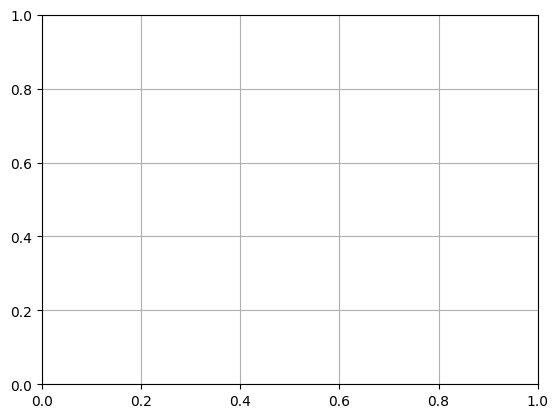

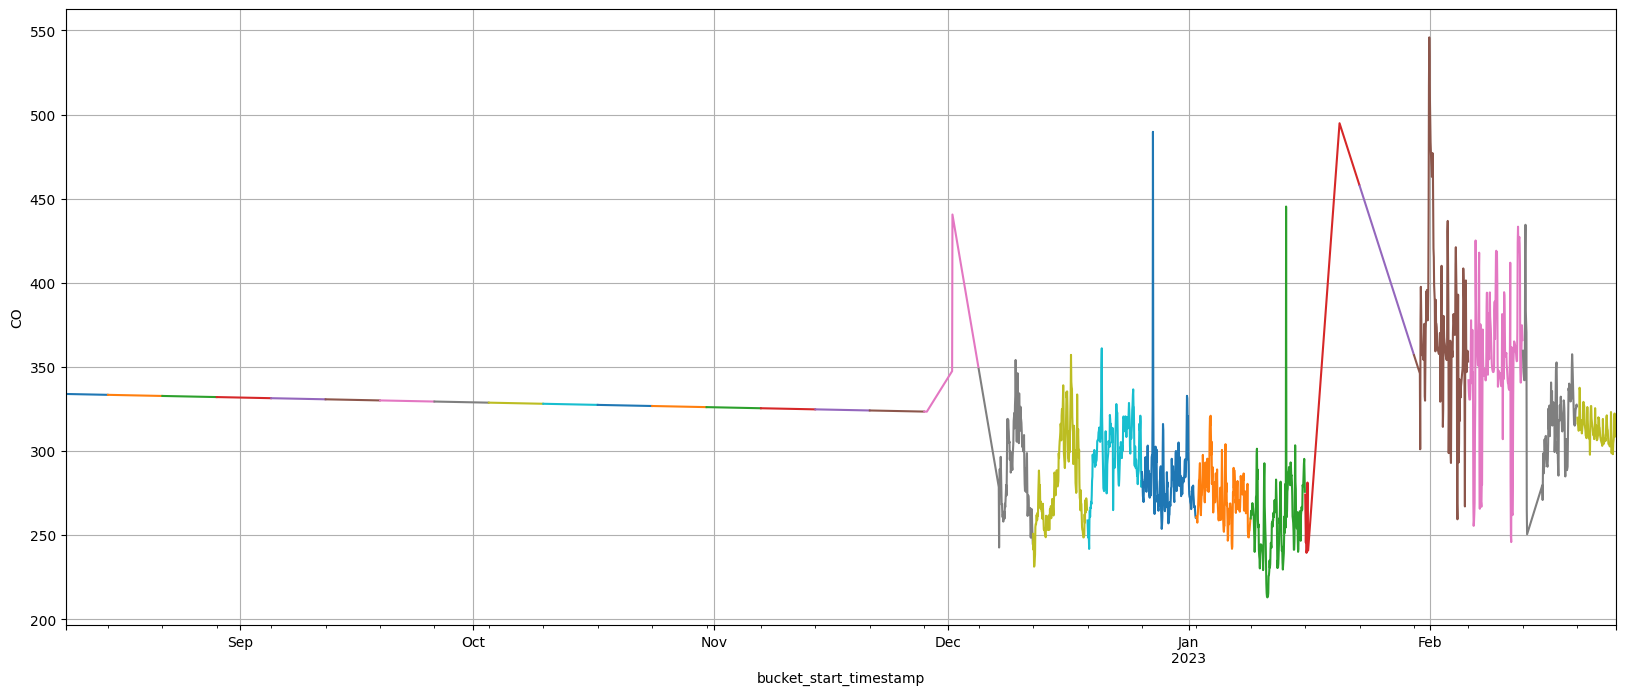

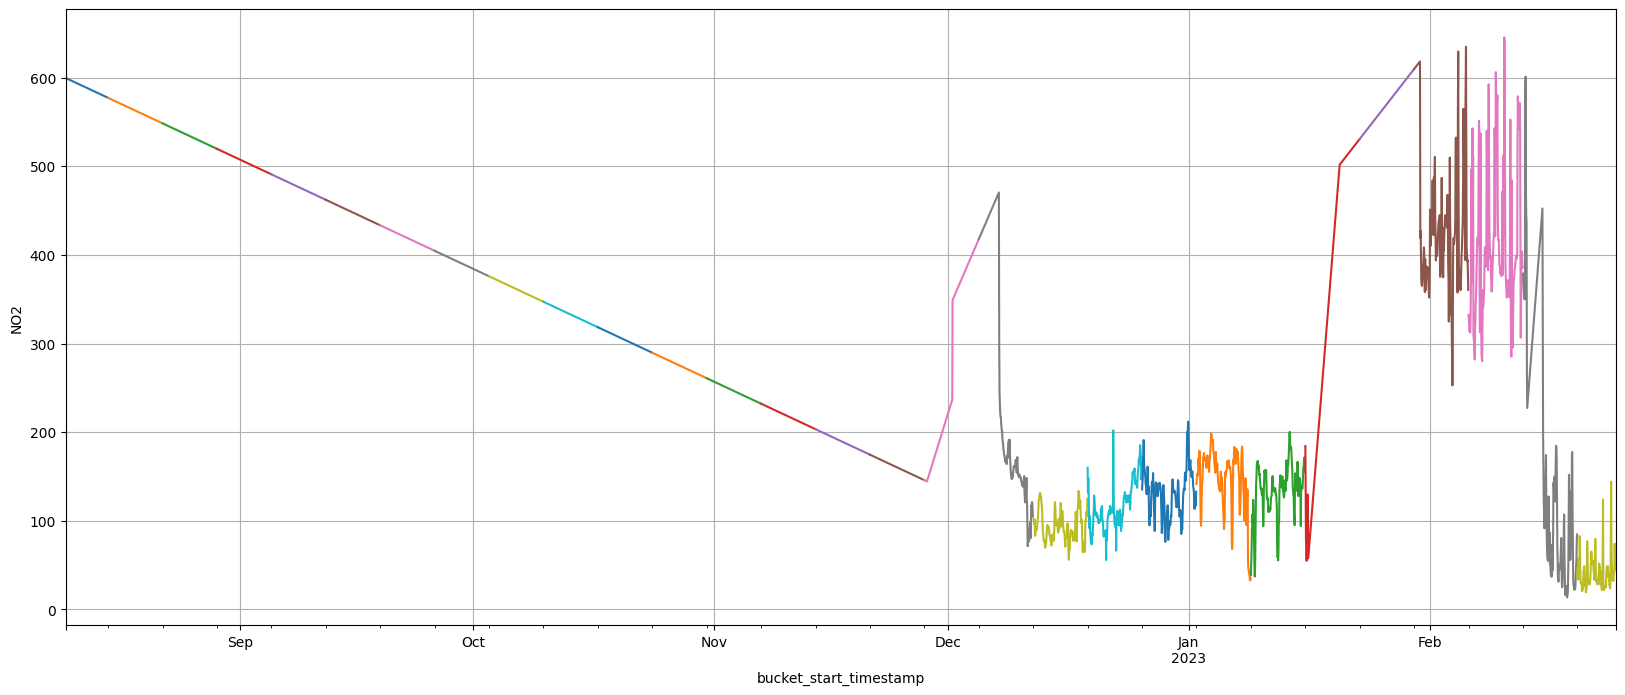

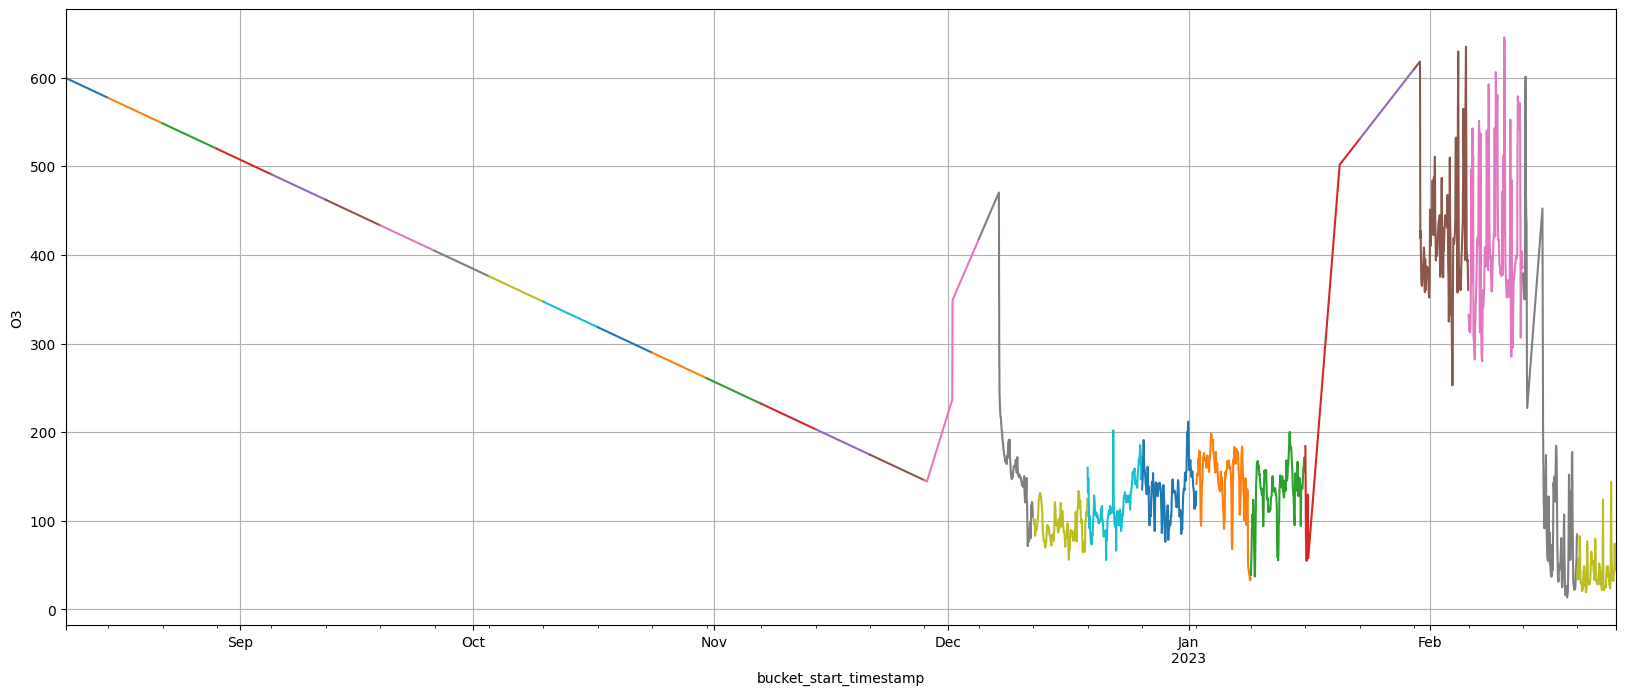

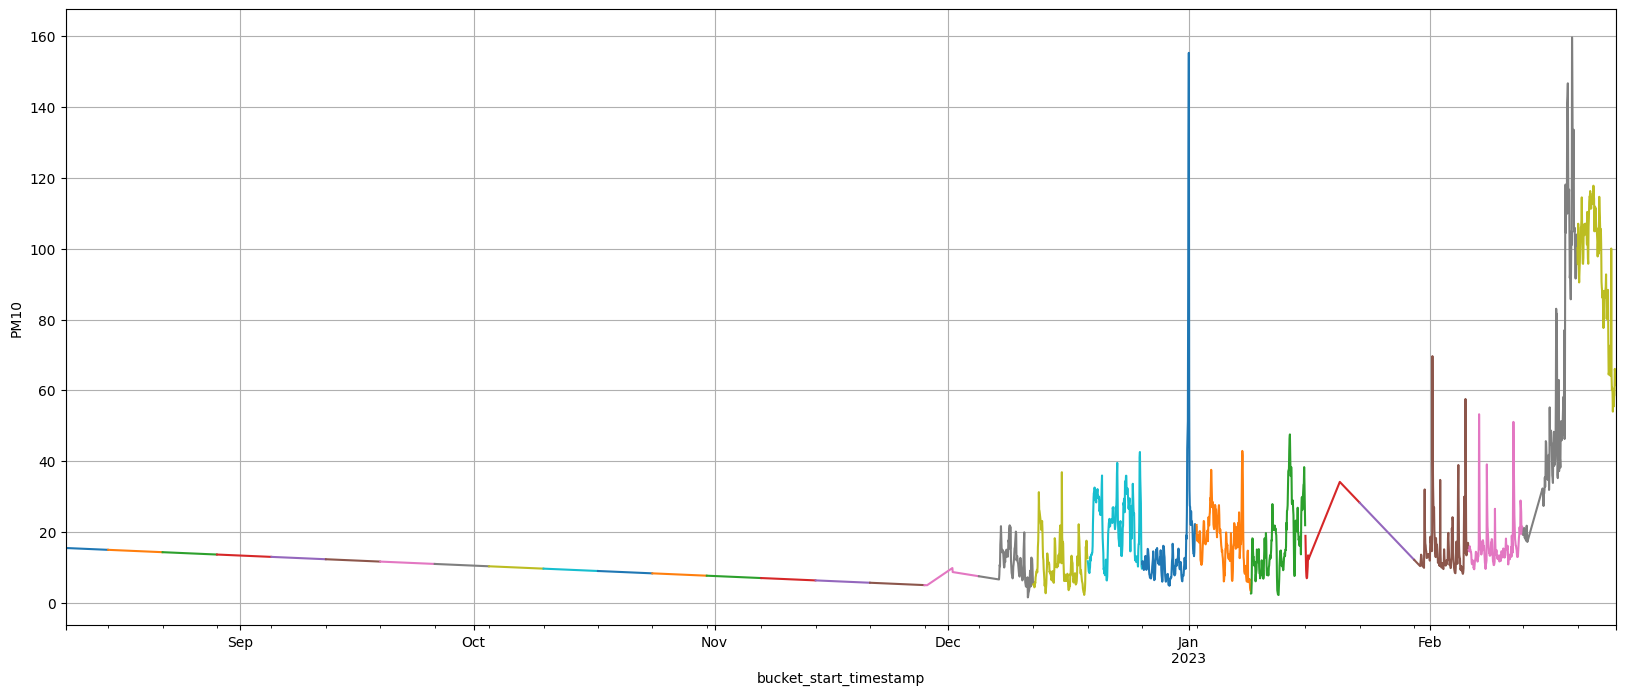

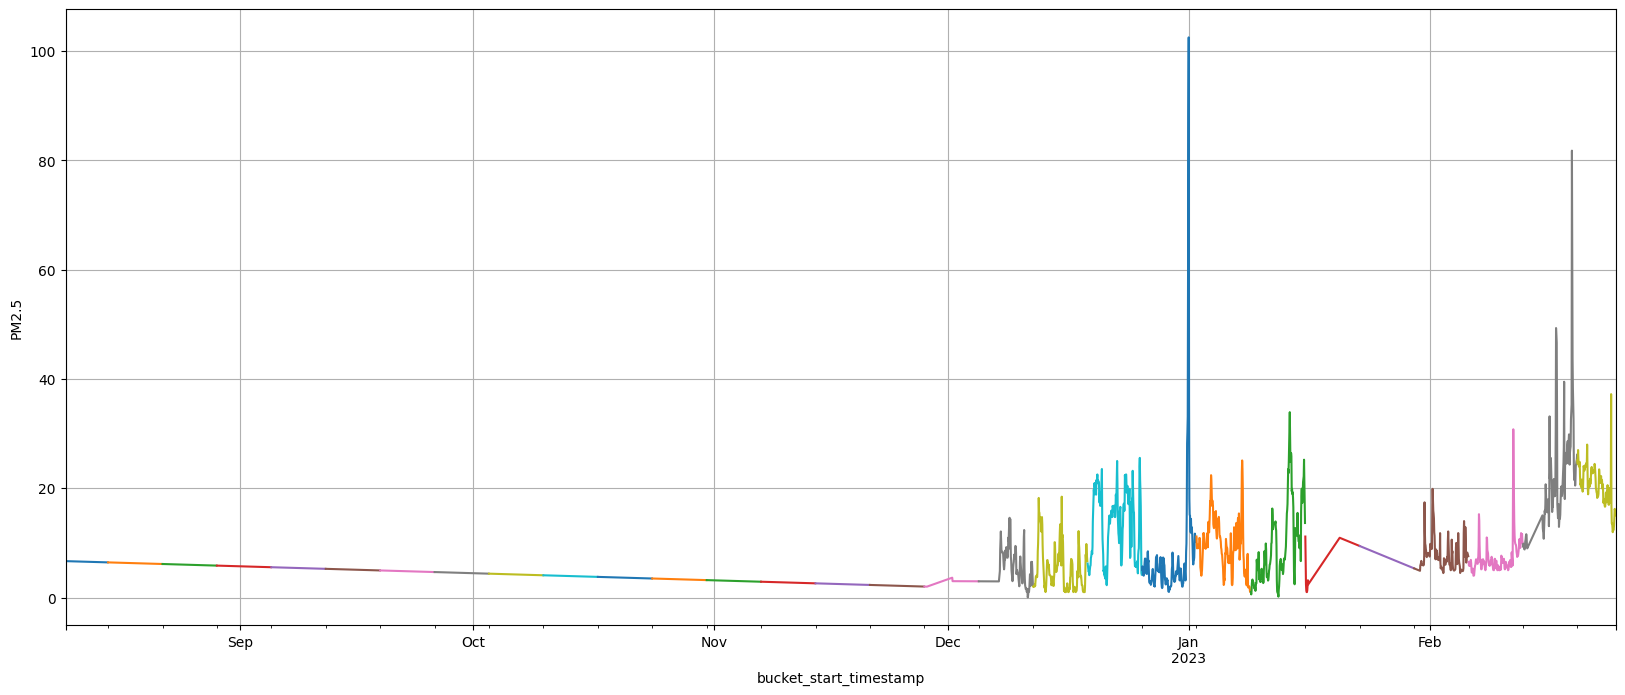

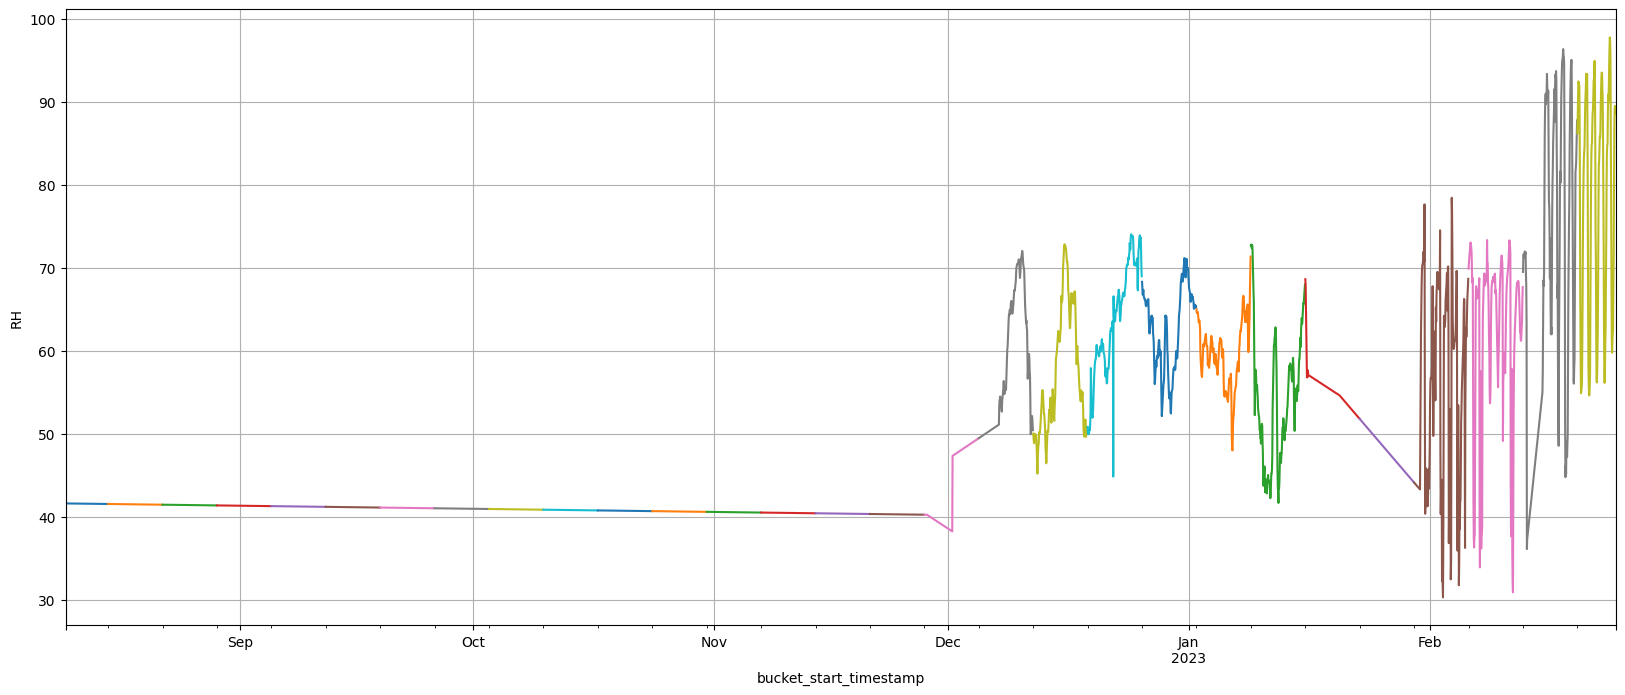

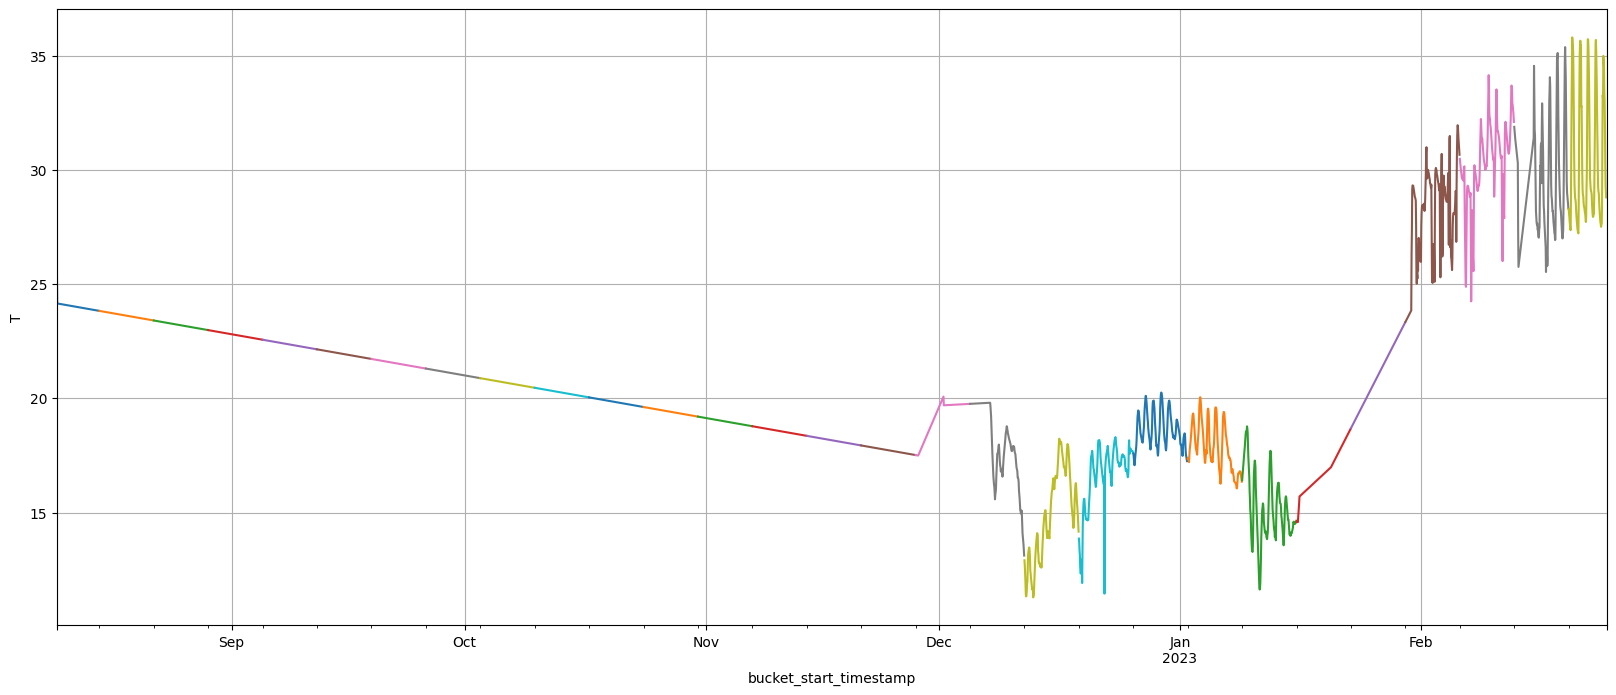

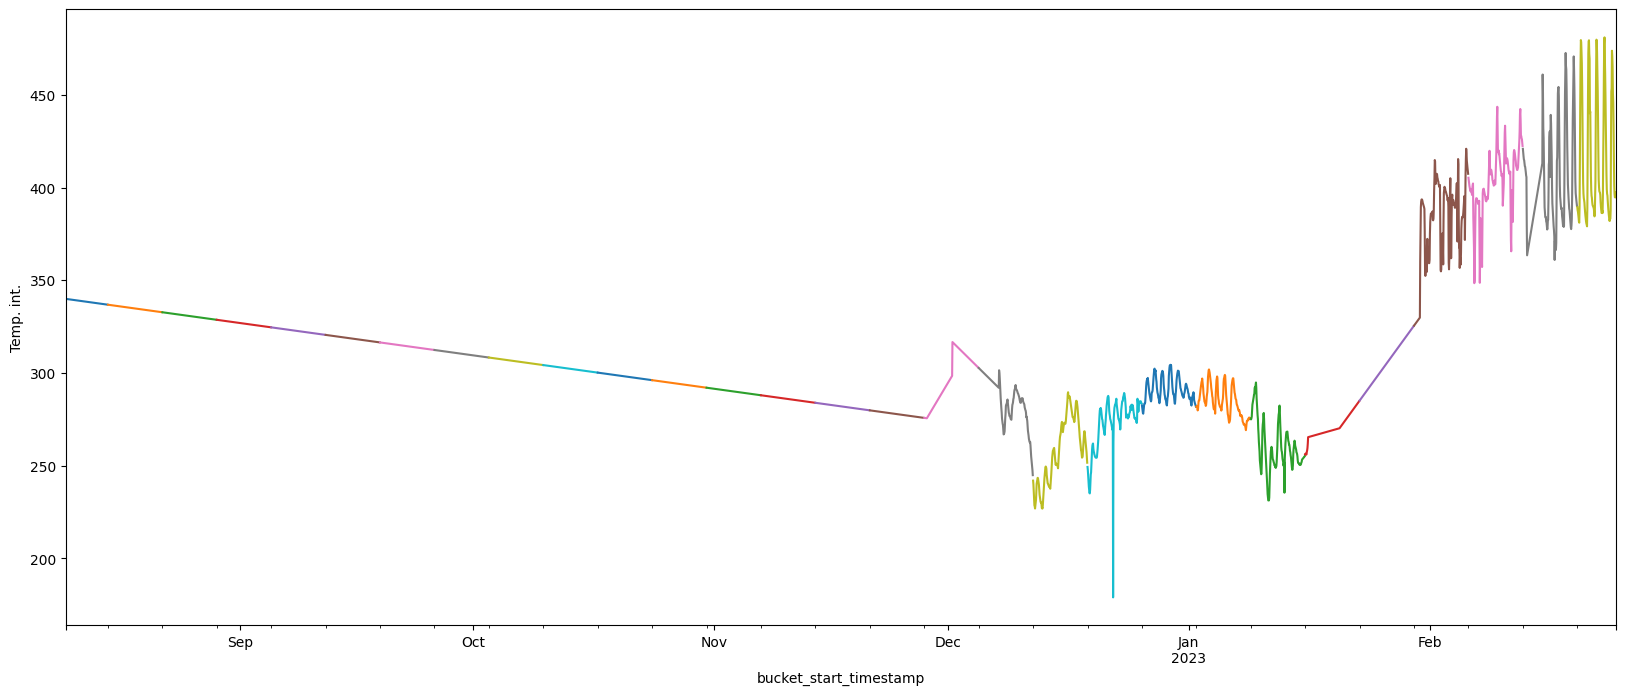

In [70]:
# visualisation des variables quantitatives pour le capteur 188
for colonne in smart188.select_dtypes('float'):
	plt.grid()
	plt.figure()
	# smart188.loc[:, colonne].resample('D').std().plot(figsize=(20, 8), ylabel=colonne)
	smart188.loc[:, colonne].resample('W').plot(figsize=(20, 8), ylabel=colonne)
	# smart188.loc['2023-01-06 16:00':'2023-02-24', colonne].resample('W').plot(figsize=(20, 8), ylabel=colonne)
	# smart189[colonne].plot(figsize=(20, 8), ylabel=colonne)

Matrice de corrélation entre les variables quantitatives pour le capteur 188

<AxesSubplot: >

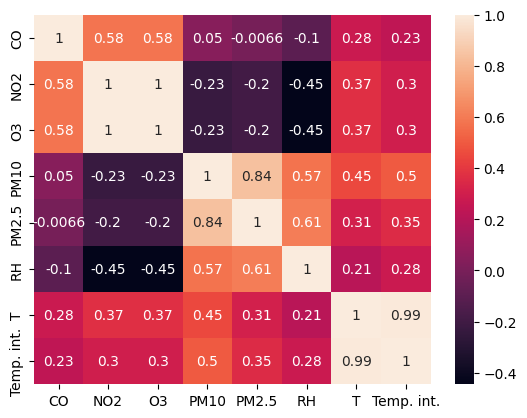

In [17]:
sns.heatmap(smart188[smart188.columns].corr(), annot=True)

Matrice de corrélation entre les variables quantitatives pour le capteur 189

<AxesSubplot: >

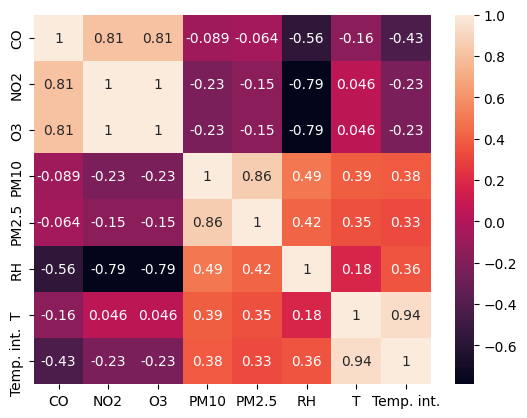

In [18]:
sns.heatmap(smart189[smart189.columns].corr(), annot=True)

## 2. Pré-traitement

### 2.1. Normalisation du dataset

Importation des modules de pre-processing

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

Fonction de pré-traitement

In [20]:
def preprocessing_data(data: pd.DataFrame, scaler) -> pd.DataFrame:
    ''' effectue le preprocessing d'un dataset
    '''
    # copie du dataset
    data1 = data.copy()
    # normalisation des variables
    data1.loc[:,'CO':'Temp. int.'] = scaler.fit_transform(data1)
    return data1

In [21]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MaxAbsScaler()
preprocessed188 = preprocessing_data(smart188, scaler)
preprocessed189 = preprocessing_data(smart188, scaler)
preprocessed188.sample(3)

,CO,NO2,O3,PM10,PM2.5,RH,T,Temp. int.
bucket_start_timestamp,,,,,,,,
2023-01-21 14:00:00,0.796275,0.793428,0.793428,0.189266,0.099792,0.341603,0.263842,0.324330
2022-12-21 10:00:00,0.206055,0.104341,0.104341,0.030789,0.023740,0.390451,0.258025,0.332629
2022-12-22 15:00:00,0.310735,0.144274,0.144274,0.161746,0.183415,0.512994,0.261697,0.347307


### 2.2. Préparation au Machine Learning

Importation des modules pour le Machine Learning

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR

Création des features et des targets

In [68]:
# les features
X_co = np.array(preprocessed188.index)
X_no2 = X_o3 = X_pm10 = X_pm2_5 = X_rh = X_t = X_temp_int = X_co

# les targets
y_co = preprocessed188['CO']
y_no2 = preprocessed188['NO2']
y_o3 = preprocessed188['O3']
y_pm10 = preprocessed188['PM10']
y_pm2_5 = preprocessed188['PM2.5']
y_rh = preprocessed188['RH']
y_t = preprocessed188['T']
y_temp_int = preprocessed188['Temp. int.']

Création des ensembles d'apprentissage (train set) et des ensembles de test (test set)

In [60]:
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(
    X_co, y_co, test_size=0.2, random_state=2)

X_train_no2, X_test_no2, y_train_no2, y_test_no2 = train_test_split(
    X_no2, y_no2, test_size=0.2, random_state=2)

X_train_o3, X_test_o3, y_train_o3, y_test_o3 = train_test_split(
    X_o3, y_o3, test_size=0.2, random_state=2)

X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_split(
    X_pm10, y_pm10, test_size=0.2, random_state=2)

X_train_pm2_5, X_test_pm2_5, y_train_pm2_5, y_test_pm2_5 = train_test_split(
    X_pm2_5, y_pm2_5, test_size=0.2, random_state=2)

X_train_rh, X_test_rh, y_train_rh, y_test_rh = train_test_split(
    X_rh, y_rh, test_size=0.2, random_state=2)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_t, y_t, test_size=0.2, random_state=2)

X_train_temp_int, X_test_temp_int, y_train_temp_int, y_test_temp_int = train_test_split(
    X_temp_int, y_temp_int, test_size=0.2, random_state=2)

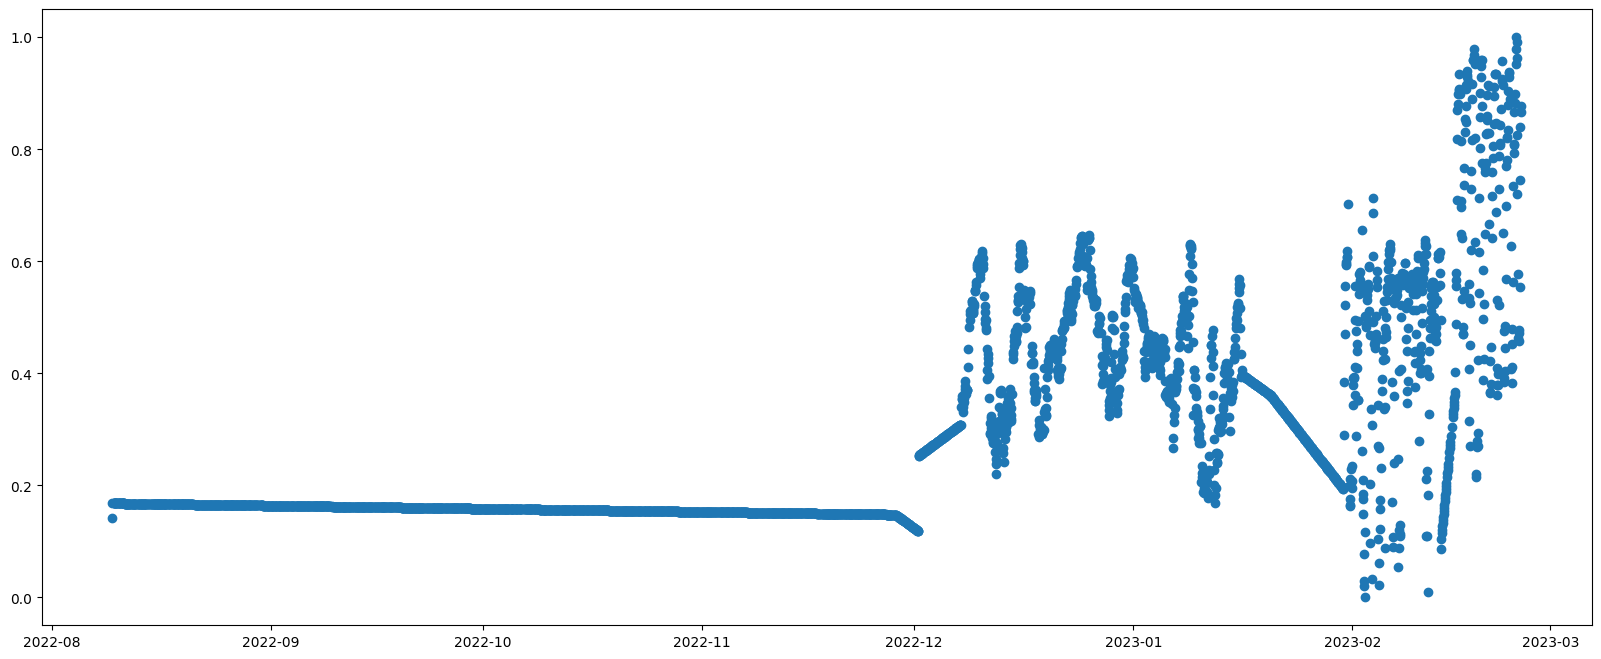

In [67]:
plt.figure(figsize=(20, 8))
plt.scatter(X_train_rh, y_train_rh)

**Conclusion** : <br>
Au terme de notre étude, on remarque les données varient énormément sur le long de l'année. Dans ce cas, il serait possible de faire une étude mensuelle (ou hebdomadaire ou quotidienne) des indicateurs. Mais en ce qui concerne la prédiction des données futures sur une année, cela est très difficile car nous ne disposons pas de données suffisantes. En effet, les enregistrements n'ont été effectués que durant la période de août 2022 à février 2023, soit 7 mois au plus sur les 12 mois de l'année. Remarquant déjà la grande variabilité et l'évolution imprévisible des valeurs des indicateurs, il ne serait pas aisé de deviner l'évolution de ces valeurs durant les 5 mois restants.